In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import csv

def peek_file(filename, num_lines=5):
    try:
        with open(filename, 'r', encoding='utf-8') as f:
            print("First few lines with UTF-8 encoding:")
            for i, line in enumerate(f):
                if i < num_lines:
                    print(f"Line {i + 1}: {line}")
    except UnicodeDecodeError:
        try:
            with open(filename, 'r', encoding='latin-1') as f:
                print("First few lines with latin-1 encoding:")
                for i, line in enumerate(f):
                    if i < num_lines:
                        print(f"Line {i + 1}: {line}")
        except Exception as e:
            print(f"Error reading file: {e}")

# Let's look at the first few lines
peek_file('airbnb-listings.csv')

# Now try reading with different parameters
try:
    # Try reading with csv module first to determine delimiter
    with open('airbnb-listings.csv', 'r', encoding='utf-8') as csvfile:
        dialect = csv.Sniffer().sniff(csvfile.read(4096))
        print(f"\nDetected delimiter: {dialect.delimiter}")
        csvfile.seek(0)
        
        # Read the file with detected parameters
        data = pd.read_csv('airbnb-listings.csv',
                          encoding='utf-8',
                          sep=dialect.delimiter,
                          on_bad_lines='skip',
                          low_memory=False)
        print("Successfully loaded the data!")
except UnicodeDecodeError:
    try:
        # Try with latin-1 encoding
        with open('airbnb-listings.csv', 'r', encoding='latin-1') as csvfile:
            dialect = csv.Sniffer().sniff(csvfile.read(4096))
            print(f"\nDetected delimiter: {dialect.delimiter}")
            csvfile.seek(0)
            
            data = pd.read_csv('airbnb-listings.csv',
                              encoding='latin-1',
                              sep=dialect.delimiter,
                              on_bad_lines='skip',
                              low_memory=False)
            print("Successfully loaded the data!")
    except Exception as e:
        print(f"Error reading file: {e}")

First few lines with UTF-8 encoding:
Line 1: ﻿ID;Listing Url;Scrape ID;Last Scraped;Name;Summary;Space;Description;Experiences Offered;Neighborhood Overview;Notes;Transit;Access;Interaction;House Rules;Thumbnail Url;Medium Url;Picture Url;XL Picture Url;Host ID;Host URL;Host Name;Host Since;Host Location;Host About;Host Response Time;Host Response Rate;Host Acceptance Rate;Host Thumbnail Url;Host Picture Url;Host Neighbourhood;Host Listings Count;Host Total Listings Count;Host Verifications;Street;Neighbourhood;Neighbourhood Cleansed;Neighbourhood Group Cleansed;City;State;Zipcode;Market;Smart Location;Country Code;Country;Latitude;Longitude;Property Type;Room Type;Accommodates;Bathrooms;Bedrooms;Beds;Bed Type;Amenities;Square Feet;Price;Weekly Price;Monthly Price;Security Deposit;Cleaning Fee;Guests Included;Extra People;Minimum Nights;Maximum Nights;Calendar Updated;Has Availability;Availability 30;Availability 60;Availability 90;Availability 365;Calendar last Scraped;Number of Revie

In [10]:
print("\nDataset Info:")
data.info()

print("\nFirst few rows:")
display(data.head())

# Basic statistics
print("\nBasic statistics:")
display(data.describe())

# Check for missing values
print("\nMissing values:")
missing_values = data.isnull().sum()
display(missing_values[missing_values > 0])


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494954 entries, 0 to 494953
Data columns (total 89 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              494954 non-null  object 
 1   Listing Url                     494954 non-null  object 
 2   Scrape ID                       494954 non-null  object 
 3   Last Scraped                    494953 non-null  object 
 4   Name                            494536 non-null  object 
 5   Summary                         478753 non-null  object 
 6   Space                           347018 non-null  object 
 7   Description                     494794 non-null  object 
 8   Experiences Offered             494954 non-null  object 
 9   Neighborhood Overview           291604 non-null  object 
 10  Notes                           197590 non-null  object 
 11  Transit                         303786 non-null  object 
 12  A

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,4008728,https://www.airbnb.com/rooms/4008728,20170402075052,2017-04-02,"Luxurious 3 bedroom, centrum, 180m2",‪This luxurious apartment is situated in the c...,In the heart of hip & lively Amsterdam Centrum...,‪This luxurious apartment is situated in the c...,none,There is a wide variety of cafes and restauran...,...,10.0,10.0,9.0,NaN,Amsterdam,strict,1.0,1.52,"52.36523660409065, 4.878249575101092","Host Has Profile Pic,Host Identity Verified,Is..."
1,7778612,https://www.airbnb.com/rooms/7778612,20170402075052,2017-04-02,Luxury apartment in city centre,"Beautiful, large (105m2, 2 floors) and quiet a...",1 living room 1 dining room 2 bedrooms 1 bathr...,"Beautiful, large (105m2, 2 floors) and quiet a...",none,Within a few minutes walking you'll be in the ...,...,10.0,10.0,9.0,NaN,Amsterdam,strict,1.0,0.81,"52.367309030897516, 4.8738407410699915","Host Is Superhost,Host Has Profile Pic,Host Id..."
2,8264596,https://www.airbnb.com/rooms/8264596,20170402075052,2017-04-02,Cosy apartment across Vondelpark,This central located apartment will make you f...,NaN,This central located apartment will make you f...,none,NaN,...,10.0,10.0,10.0,NaN,Amsterdam,flexible,1.0,0.05,"52.361943953804776, 4.866686522141489","Host Has Profile Pic,Host Identity Verified,Is..."
3,2180729,https://www.airbnb.com/rooms/2180729,20170402075052,2017-04-02,Spacious City Apartment Oud-West,Living like an Amsterdam resident in this ligh...,There are 2 bedrooms each with a double bed. I...,Living like an Amsterdam resident in this ligh...,none,The 85 m2 apartment is located on a quiet stre...,...,9.0,9.0,9.0,NaN,Amsterdam,flexible,1.0,0.62,"52.37014616115532, 4.866281767968382","Host Has Profile Pic,Host Identity Verified,Is..."
4,14463171,https://www.airbnb.com/rooms/14463171,20170402075052,2017-04-02,Cosy Studio Apartment Center Amsterdam,Studio Apartment Centre Amsterdam Perfect stud...,NaN,Studio Apartment Centre Amsterdam Perfect stud...,none,NaN,...,8.0,9.0,9.0,NaN,Amsterdam,moderate,1.0,2.04,"52.368817829014425, 4.871249476925455",Host Has Profile Pic



Basic statistics:


,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,4.949540e+05,379884.000000,494449.000000,494448.000000,494953.000000,494953.000000,494891.000000,493428.000000,494328.000000,494037.000000,...,494952.000000,367134.000000,366237.000000,366479.000000,365918.000000,366434.000000,365969.000000,365873.000000,494087.000000,372947.000000
mean,3.234417e+07,93.376549,9.549721,9.549738,38.042292,-15.020974,3.311584,1.249632,1.378322,1.934525,...,16.740850,92.913988,9.527773,9.328483,9.692770,9.709972,9.471171,9.323047,6.869659,1.479523
std,3.172156e+07,17.592441,57.199523,57.199579,22.941429,70.364294,2.094052,0.607029,0.942508,1.488128,...,32.336701,8.543725,0.852536,1.035356,0.727947,0.719978,0.803260,0.903585,41.977381,1.731931
min,1.900000e+01,0.000000,0.000000,0.000000,-38.224427,-123.218712,1.000000,0.000000,0.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,6.886060e+06,98.000000,1.000000,1.000000,38.913119,-73.969216,2.000000,1.000000,1.000000,1.000000,...,1.000000,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.320000
50%,2.188181e+07,100.000000,1.000000,1.000000,42.310894,2.137584,2.000000,1.000000,1.000000,1.000000,...,4.000000,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.880000
75%,4.792177e+07,100.000000,3.000000,3.000000,51.375424,12.444849,4.000000,1.000000,2.000000,2.000000,...,18.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.030000
max,1.350885e+08,100.000000,1114.000000,1114.000000,55.994889,153.637837,21.000000,10.000000,96.000000,19.000000,...,735.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,752.000000,223.000000



Missing values:


Last Scraped                           1
Name                                 418
Summary                            16201
Space                             147936
Description                          160
                                   ...  
Cancellation Policy                    2
Calculated host listings count       867
Reviews per Month                 122007
Geolocation                            1
Features                             306
Length: 83, dtype: int64

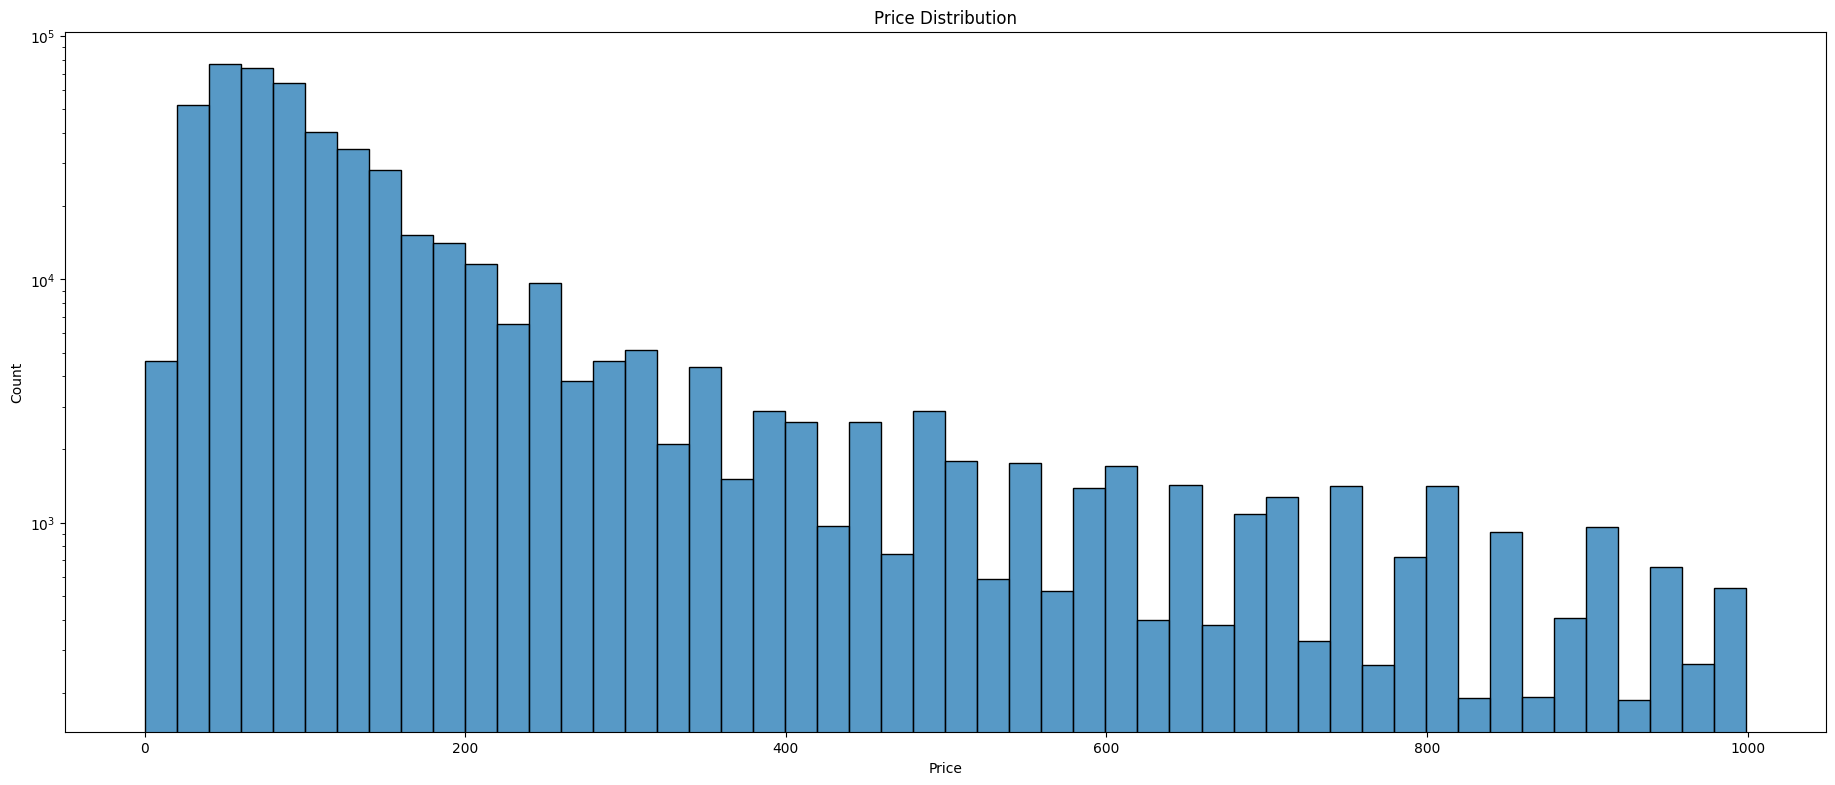

In [26]:
plt.figure(figsize=(50, 20))

# 1. Price distribution
plt.subplot(2, 2, 1)
sns.histplot(data['Price'], bins=50)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.yscale('log')

([0, 1, 2, 3],
 [Text(0, 0, 'Entire home/apt'),
  Text(1, 0, 'Private room'),
  Text(2, 0, 'Shared room'),
  Text(3, 0, '9')])

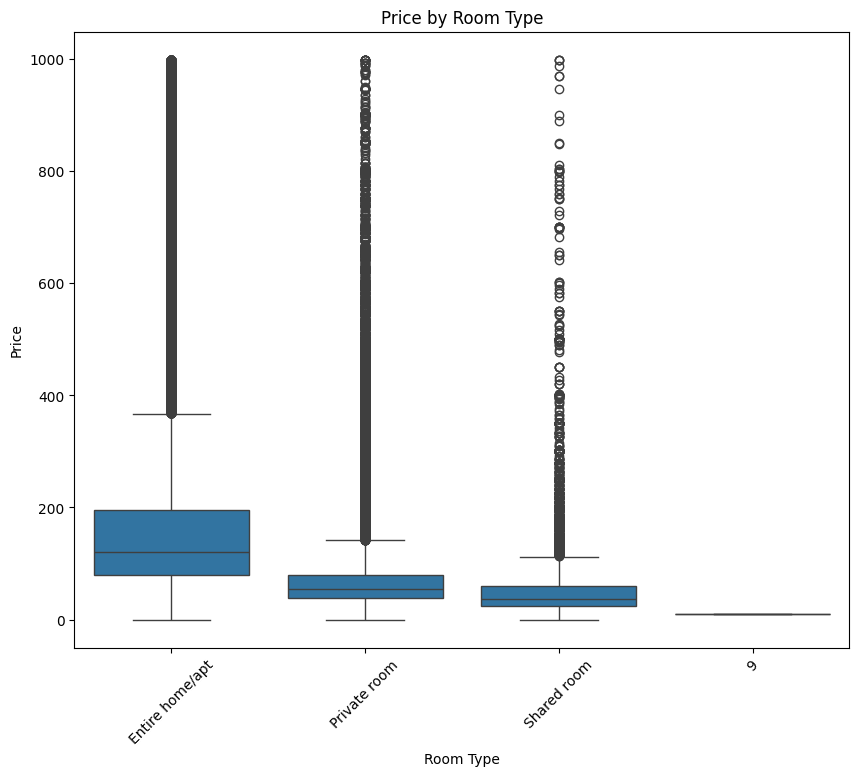

In [ ]:
# 2. Average price by room type
plt.figure(figsize=(10, 8))
sns.boxplot(x='Room Type', y='Price', data=data)
plt.title('Price by Room Type')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Williamsburg'),
  Text(1, 0, 'Montmartre'),
  Text(2, 0, 'Nørrebro'),
  Text(3, 0, 'République'),
  Text(4, 0, 'Buttes-Chaumont - Belleville'),
  Text(5, 0, 'Prati'),
  Text(6, 0, 'Neukölln'),
  Text(7, 0, 'Bedford-Stuyvesant'),
  Text(8, 0, 'Vesterbro'),
  Text(9, 0, 'Oud-West')])

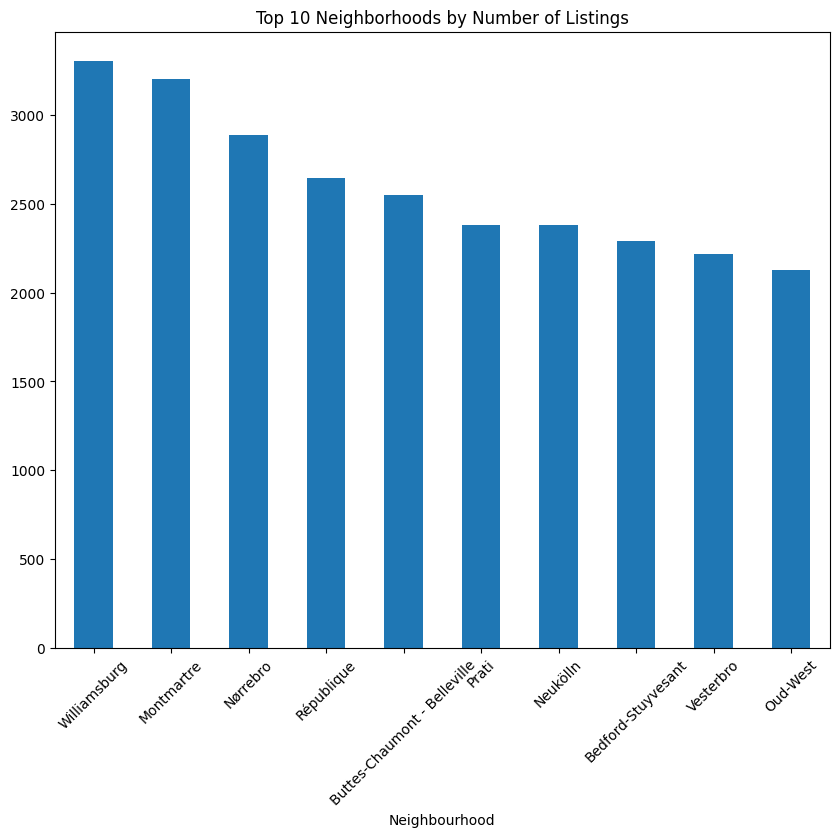

In [34]:
# 3. Number of listings by neighborhood
plt.figure(figsize=(10, 8))
data['Neighbourhood'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Neighborhoods by Number of Listings')
plt.xticks(rotation=45)

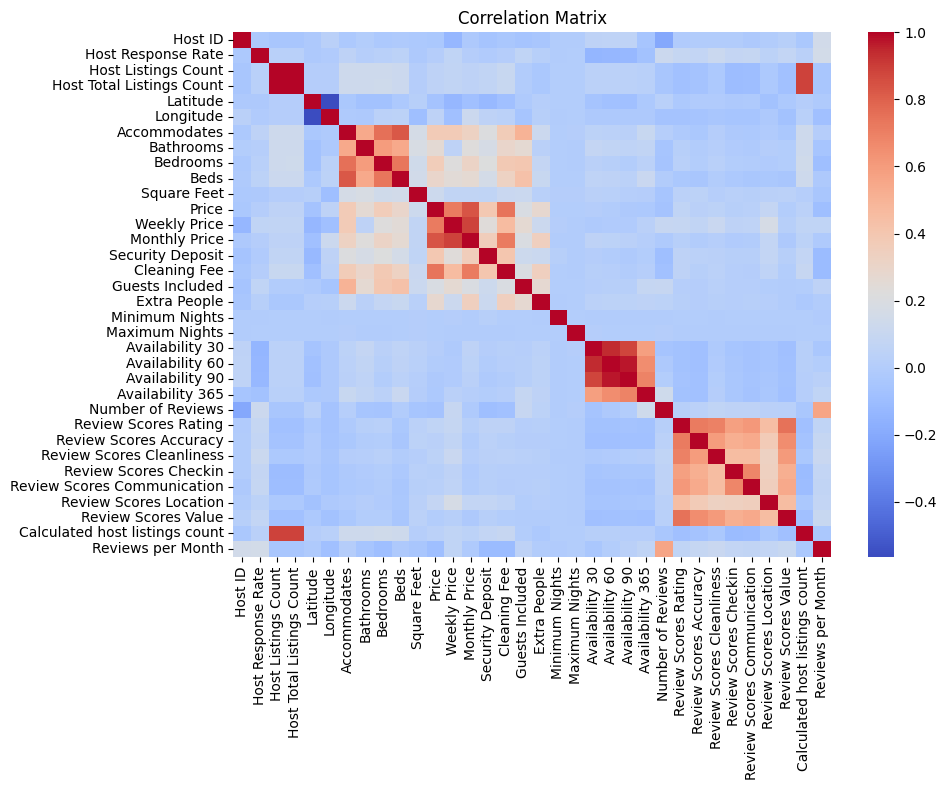

In [33]:
# 4. Correlation between numeric variables
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_columns].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

In [37]:
print("\nSummary statistics by room type:")
display(data.groupby('Room Type')['Price'].describe())

print("\nTop 10 most expensive neighborhoods (by median price):")
neighborhood_prices = data.groupby('Neighbourhood')['Price'].agg(['median', 'count'])
neighborhood_prices = neighborhood_prices[neighborhood_prices['count'] >= 5]
display(neighborhood_prices.sort_values('median', ascending=False).head(10))


Summary statistics by room type:


,count,mean,std,min,25%,50%,75%,max
Room Type,,,,,,,,
9,1.0,9.000000,NaN,9.0,9.0,9.0,9.0,9.0
Entire home/apt,306115.0,173.428914,166.250533,0.0,80.0,120.0,195.0,999.0
Private room,171965.0,79.157172,88.821447,0.0,39.0,55.0,80.0,999.0
Shared room,8915.0,60.503646,81.119746,0.0,25.0,37.0,60.0,999.0



Top 10 most expensive neighborhoods (by median price):


,median,count
Neighbourhood,,
Ap Lei Chau,845.5,6
Holmen,835.0,5
West Kowloon,776.0,7
Nyboder,774.5,16
Indre By,742.0,905
Sluseholmen,707.0,52
Christianshavn,702.0,225
Aberdeen,698.0,7
Islands Brygge,697.0,320
